In [105]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Naive Baye's 

In [106]:
from sklearn.datasets import  load_iris
from sklearn.model_selection import train_test_split

In [107]:
data=load_iris()

In [108]:
X,y=load_iris(return_X_y=True)

In [109]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [110]:
y[0:5]

array([0, 0, 0, 0, 0])

In [111]:
len(X)

150

In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

In [113]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [114]:
classifier.fit(x_train,y_train)
y_hat=classifier.predict(x_test)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [116]:
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Axes: >

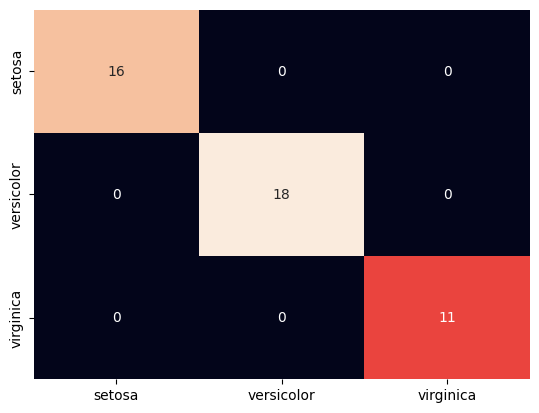

In [117]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=data.target_names,yticklabels=data.target_names,cbar=False)

### Naive Baye's Classification on seaborn dataset tips

cleaned the tips data using label encoding for binary classes and One hot encoding for the day feature as it contained 4 classes

In [118]:
df=pd.read_csv("cleaned tips.csv")
df.head()

,day_Fri,day_Sat,day_Sun,day_Thur,total_bill,tip,sex,smoker,time,size
0,0.0,0.0,1.0,0.0,16.99,1.01,1.0,0.0,1.0,2.0
1,0.0,0.0,1.0,0.0,10.34,1.66,0.0,0.0,1.0,3.0
2,0.0,0.0,1.0,0.0,21.01,3.50,0.0,0.0,1.0,3.0
3,0.0,0.0,1.0,0.0,23.68,3.31,0.0,0.0,1.0,2.0
4,0.0,0.0,1.0,0.0,24.59,3.61,1.0,0.0,1.0,4.0


#### lets try to predict wheather the person is smoker or not based on other features

In [119]:
X=df.loc[:,df.columns!='smoker']
y=df['smoker']

In [120]:
X.head()

,day_Fri,day_Sat,day_Sun,day_Thur,total_bill,tip,sex,time,size
0,0.0,0.0,1.0,0.0,16.99,1.01,1.0,1.0,2.0
1,0.0,0.0,1.0,0.0,10.34,1.66,0.0,1.0,3.0
2,0.0,0.0,1.0,0.0,21.01,3.50,0.0,1.0,3.0
3,0.0,0.0,1.0,0.0,23.68,3.31,0.0,1.0,2.0
4,0.0,0.0,1.0,0.0,24.59,3.61,1.0,1.0,4.0


In [121]:
# further split the dataset into continous and discrete data
X_cont=X[['tip','total_bill']]
X_disc=X[['day_Fri','day_Sat','day_Sun','day_Thur','total_bill','sex','time','size']]

In [122]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

In [123]:
enc = OrdinalEncoder()
X_disc_encoded = enc.fit_transform(X_disc)

In [124]:
X_cont_train, X_cont_test, X_disc_train, X_disc_test, y_train, y_test = train_test_split(
    X_cont, X_disc_encoded, y, test_size=0.3, random_state=42
)

In [125]:
gnb = GaussianNB()
gnb.fit(X_cont_train, y_train)

cnb = CategoricalNB()
cnb.fit(X_disc_train, y_train)

log_prob_gnb = gnb.predict_log_proba(X_cont_test)
log_prob_cnb = cnb.predict_log_proba(X_disc_test)

In [126]:
classes, counts = np.unique(y_train, return_counts=True)
total_samples = len(y_train)
log_priors = np.log(counts / total_samples)

In [127]:
combined_log_prob = log_prob_gnb + log_prob_cnb - log_priors

y_pred_combined = np.argmax(combined_log_prob, axis=1)

In [128]:
score=accuracy_score(y_test,y_pred_combined)
cm=confusion_matrix(y_test,y_pred_combined)
report=classification_report(y_test,y_pred_combined)

Accuracty :0.6756756756756757
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74        47
         1.0       0.55      0.59      0.57        27

    accuracy                           0.68        74
   macro avg       0.65      0.66      0.66        74
weighted avg       0.68      0.68      0.68        74



<Axes: >

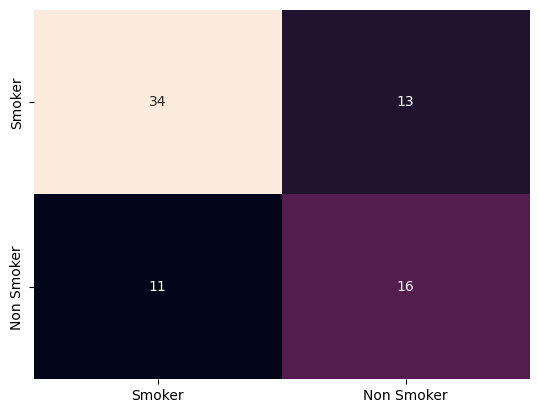

In [129]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Smoker','Non Smoker'],yticklabels=['Smoker','Non Smoker'],cbar=False)

### Observation
- Here we can see that our model gave low accuracy, to predict the smoker.
- Which aligns with our dataset and correlation amoong the features

<Axes: >

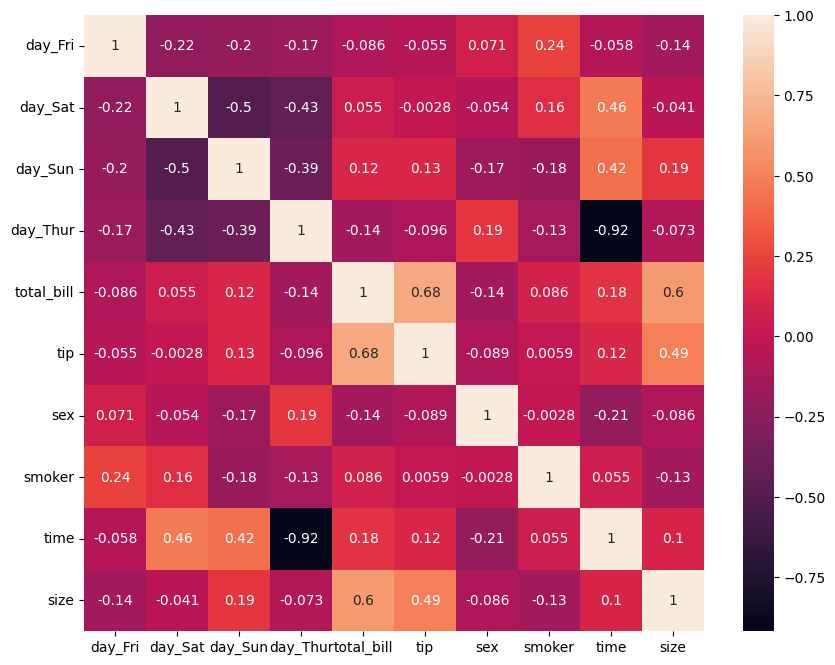

In [131]:
figure=plt.figure
figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)